# Application 1: Farm Scale Soil Moisture Estimation using Remote Sensing and Water Budget Products
## Step 2: Implementing a Machine Learning algorithm (The Relevance Vector Machine) 

### Background: 
Once we have the information from the satellite band pixels and the respective soil moisture values, we can implement a machine learning algorithm that can correlate  the band pixels (we will call this input) and soil moisture (output). There are plenty of machine learning algorithms. A good website where examples and Python implemented algorithms are compiled is https://scikit-learn.org/stable/.

In this case, we are going to use the Relevance Vector Machine algorithm. You can read the original paper here: https://www.jmlr.org/papers/volume1/tipping01a/tipping01a.pdf. This algorithm is a good example of a "classical machine learning", different of more recent algorithms such as Deep Learning (e.g. Convolutional Neural Networks). The advantage of classical machine learning is the need of much less information than deep learning algorithms.

Let's install the necessary python library. Open the terminal and pass the following command.

Let's start importing the csv file generated in Step 2:

In [10]:
import pandas as pd
sma = pd.read_csv('./Results Step 2/machine_learning_data.csv')
sma#.head(3)

,SM,BAI,SAVIT,B4,B6,NDSI,MNDWI,CVI,SAVI,GEMI,...,NGRDI,VARI,NBR,MNDVI,GVMI,B2,NBRT,kVARI,B3,B1
0,0.39,10.113513,0.539735,0.3735,295.5,-0.358974,-0.358974,3.486000,0.411152,0.757530,...,0.086957,0.142012,0.618986,0.618986,0.628827,0.0900,0.986187,0.014440,0.0756,0.0642
1,0.32,10.595909,0.532088,0.3666,296.0,-0.387547,-0.387547,3.652422,0.395080,0.741872,...,0.054482,0.089423,0.556688,0.556688,0.579019,0.0900,0.983282,0.005706,0.0807,0.0667
2,0.50,12.580357,0.504472,0.3416,296.5,-0.288564,-0.288564,2.571921,0.357753,0.702719,...,0.107660,0.176122,0.555556,0.555556,0.579399,0.1070,0.983199,0.022106,0.0862,0.0751
3,0.47,11.995843,0.511969,0.3485,297.0,-0.300235,-0.300235,2.838363,0.361701,0.707913,...,0.081389,0.139061,0.562430,0.562430,0.584526,0.1043,0.983502,0.012890,0.0886,0.0800
4,0.07,20.168927,0.399352,0.2589,313.6,-0.318784,-0.318784,1.857574,0.080603,0.391713,...,-0.090166,-0.140731,-0.047286,-0.047286,0.081839,0.1670,0.933352,0.015952,0.2001,0.1319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,0.17,4.199442,0.703307,0.5458,303.9,-0.471952,-0.471952,4.761866,0.614990,0.954561,...,0.186415,0.280045,0.696085,0.696085,0.691461,0.0786,0.989168,0.062334,0.0539,0.0443
65,0.11,6.985466,0.601447,0.4374,311.4,-0.456553,-0.456553,4.331592,0.396983,0.750485,...,-0.057060,-0.084516,0.431751,0.431751,0.470315,0.1132,0.975583,0.006129,0.1269,0.0780
66,0.08,6.468516,0.613699,0.4510,311.8,-0.436736,-0.436736,3.826251,0.388847,0.740694,...,-0.045471,-0.066343,0.414236,0.414236,0.454210,0.1291,0.974500,0.003832,0.1414,0.0851
67,0.16,5.969022,0.633905,0.4679,303.9,-0.441563,-0.441563,5.006214,0.523859,0.871989,...,0.086386,0.130753,0.673761,0.673761,0.672508,0.0786,0.988223,0.013636,0.0661,0.0491


## Setting Up the Relevance Vector Machine
Now that the data is in the adequate format (a table), we will run the RVM algorithm. The bands will be inputs (x) and soil moisture the output (y)

Let's try all the data (all rows and all remote sensing information)

In [13]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn_rvm import EMRVR

# x_train=sm.loc[:, sm.columns == 'BAI'].to_numpy()
x=sma.loc[:, sma.columns != 'SM'].to_numpy()

t=sma[['SM']].to_numpy()


xl = np.linspace(1, len(t), len(t))


model = EMRVR(kernel='rbf', gamma='auto',bias_used=True)
model.fit(x, t.ravel())

y, y_std = model.predict(x, return_std=True)

Let's plot the results

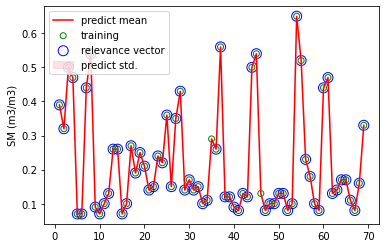

In [14]:
plt.scatter(xl, y, facecolor='none', edgecolor='g', label='training')
plt.scatter(xl[model.relevance_], y[model.relevance_], s=100, facecolor='none', edgecolor='b', label='relevance vector')
plt.plot(xl[:, None], y, color='r', label='predict mean')
plt.fill_between(xl, y - y_std, y + y_std, color='pink', alpha=0.5, label='predict std.')
plt.legend(loc='best')
plt.ylabel("SM (m3/m3)")

plt.show()

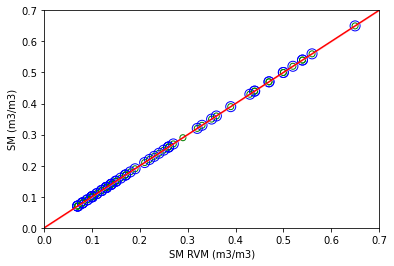

In [16]:
plt.scatter(t,y, facecolor='none', edgecolor='g')
plt.scatter(t[model.relevance_], y[model.relevance_], s=100, facecolor='none', edgecolor='b', label='relevance vector')

plt.xlabel("SM RVM (m3/m3)")
plt.ylabel("SM (m3/m3)")

axes = plt.gca()
axes.set_xlim([0,0.7])
axes.set_ylim([0,0.7])

xx = np.linspace(0,0.7,len(y))
yx = xx
plt.plot(xx, yx, '-r', label='y=x')
plt.fill_between(xx, yx - y_std, yx + y_std, color='pink', alpha=0.5, label='predict std.')


In [18]:
import math
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(t, y)
rmse = math.sqrt(mse)
print('RMSE = %.2f' %rmse, "m3/m3")

RMSE = 0.00 m3/m3


In [19]:
r2 = r2_score(t, y)
print("r2 =%.2f" %r2)

r2 =1.00


We have two questions: Which of the variables can best represent the variability in soil moisture and how we deal with a small number of variables.

For the first question, we can test each of the variables indivudually and then combine the most promissing.

For the second question, we need to use a concept called "CrossValidation". We will divide the total number of samples and change training and testing groups for "n" times, while tracking a goodness of fit statistic, like Mean Square Error or Coefficient of Determination (r2).

Let's implement this for Band 1 (blue)

In [23]:
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

x=sma.loc[:, sma.columns != 'SM'].to_numpy()
model = EMRVR(kernel='rbf', bias_used=True, gamma='auto')

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

In [26]:
# Forward Variable Selection(fvs)
fvs = SFS(model,
          k_features='parsimonious', #best or parsimonious (simplest model within 1 CI of best)
          forward=True,
          floating=False,
          verbose =1,
          scoring = 'neg_mean_squared_error',
          cv = 5,
         n_jobs=4)

In [27]:
fvs.fit(x, t.ravel())
# sfs.k_feature_names_ 

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  39 out of  39 | elapsed:  1.5min finished
Features: 1/39[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  38 out of  38 | elapsed:   16.8s finished
Features: 2/39[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  37 out of  37 | elapsed:   21.3s finished
Features: 3/39[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  36 out of  36 | elapsed:   14.1s finished
Features: 4/39[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  35 out of  35 | elapsed:   15.6s finished
Features: 5/39[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  34 out of  34 | elapsed:   13.1s finished
Features: 6/39[Parallel(n_jobs=4)]: Using backend LokyBacken

SequentialFeatureSelector(estimator=EMRVR(gamma='auto'),
                          k_features='parsimonious', n_jobs=4,
                          scoring='neg_mean_squared_error', verbose=1)

we can access the indices of the best features directly via the k_feature_idx_ attribute:

In [28]:
(fvs.k_feature_idx_)

(1, 2, 3, 4, 5, 7, 8, 10, 11, 23, 28, 33, 35, 37)

the prediction score for these selected features can be accesses via k_score_:

In [29]:
fvs.k_score_

-0.008709847661939708

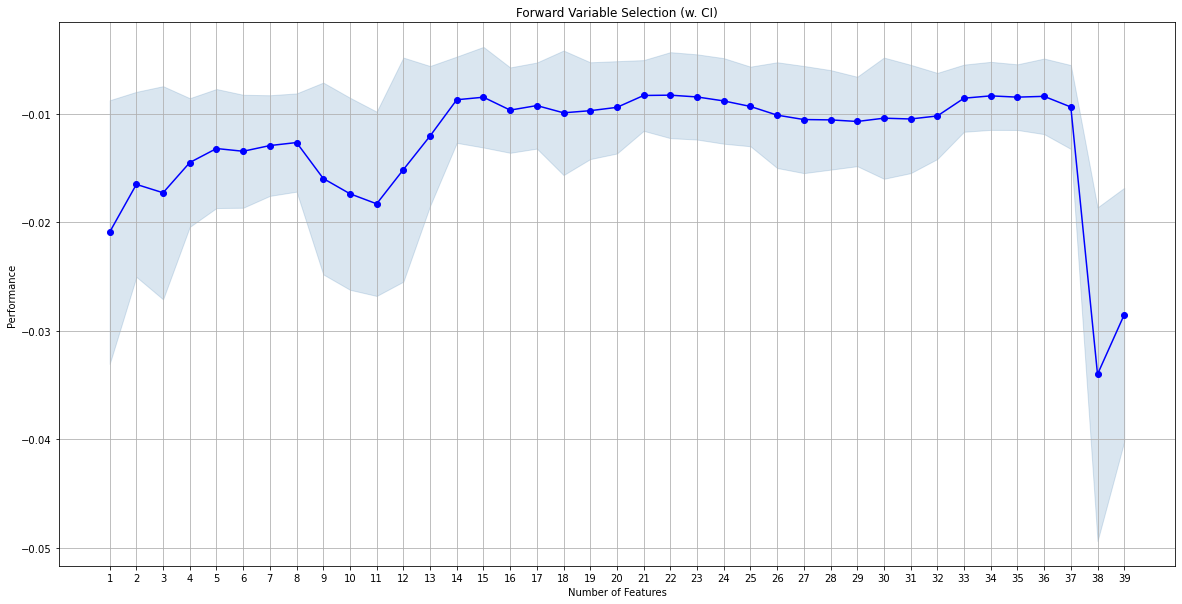

In [30]:
fig_fvs = plot_sfs(fvs.get_metric_dict(), kind='ci',figsize=(20,10))
plt.title('Forward Variable Selection (w. CI)')
plt.grid()
plt.show()

In [31]:
sfs_results=pd.DataFrame.from_dict(fvs.get_metric_dict()).T
sfs_results.head()

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(2,)","[-0.05677028708943369, -0.018498508540582843, ...",-0.02091,"(2,)",0.012153,0.016364,0.005455
2,"(2, 35)","[-0.04213950758279724, -0.01987793557486028, -...",-0.016511,"(2, 35)",0.008528,0.011482,0.003827
3,"(2, 8, 35)","[-0.04685331818310145, -0.01955162882503068, -...",-0.017284,"(2, 8, 35)",0.009826,0.013229,0.00441
4,"(2, 4, 8, 35)","[-0.02979398420706902, -0.01870573931228377, -...",-0.014498,"(2, 4, 8, 35)",0.00593,0.007984,0.002661
5,"(2, 4, 8, 11, 35)","[-0.022929379541933248, -0.026773882398911104,...",-0.013207,"(2, 4, 8, 11, 35)",0.005486,0.007387,0.002462


In [32]:
#backward variable selection(bvs)
bvs = SFS(model,
         k_features='parsimonious',
         forward=False,
         floating=False,
         verbose =1,
          scoring = 'neg_mean_squared_error',
          cv = 10,
         n_jobs=4)

In [33]:
bvs.fit(x_train, y_train.ravel())
# sfs1.k_feature_names_

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  39 out of  39 | elapsed:    7.3s finished
Features: 38/1[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  38 out of  38 | elapsed:    6.8s finished
Features: 37/1[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  37 out of  37 | elapsed:    6.8s finished
Features: 36/1[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  36 out of  36 | elapsed:    6.6s finished
Features: 35/1[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  35 out of  35 | elapsed:    7.3s finished
Features: 34/1[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  34 out of  34 | elapsed:    5.9s finished
Features: 33/1[Parallel(n_jobs=4)]: Using backend LokyBacken

SequentialFeatureSelector(cv=10, estimator=EMRVR(gamma='auto'), forward=False,
                          k_features='parsimonious', n_jobs=4,
                          scoring='neg_mean_squared_error', verbose=1)

In [38]:
(bvs.k_feature_idx_)

(3, 4, 8, 19, 20, 21, 30, 31, 33, 36, 37)

In [39]:
bvs.k_score_

-0.012762505462205708

In [40]:
bvs_results=pd.DataFrame.from_dict(bvs.get_metric_dict()).T
bvs_results.head()

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
39,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-0.05863666456012925, -0.034728781577338295, ...",-0.028526,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.011694,0.015745,0.005248
38,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-0.05889356850016843, -0.03481138919610508, -...",-0.025799,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.010311,0.013883,0.004628
37,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14,...","[-0.05985293014423069, -0.02582876973670849, -...",-0.025384,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14,...",0.010779,0.014512,0.004837
36,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 11, 12, 13, 14, 15...","[-0.061013756708688124, -0.021699792732409486,...",-0.024832,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 11, 12, 13, 14, 15...",0.012631,0.017007,0.005669
35,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 11, 13, 14, 15, 16...","[-0.0614640540103478, -0.014858822113355567, -...",-0.022896,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 11, 13, 14, 15, 16...",0.013171,0.017734,0.005911


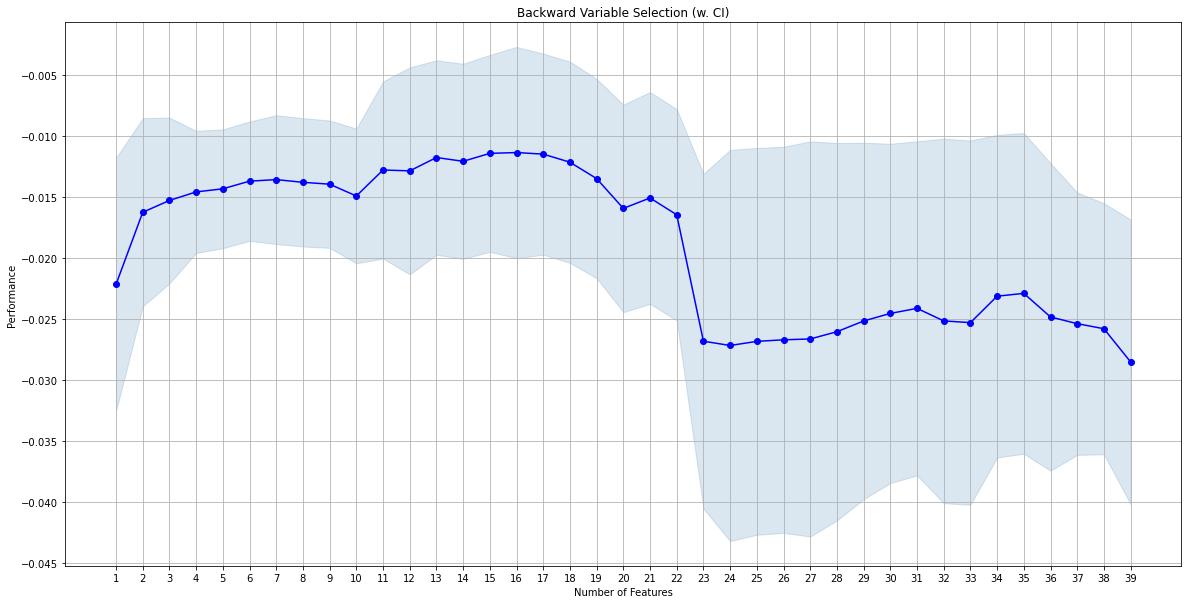

In [41]:
# bvs.k_feature_names_
fig1 = plot_sfs(bvs.get_metric_dict(), kind='ci',figsize=(20,10))
plt.title('Backward Variable Selection (w. CI)')
plt.grid()
plt.show()

In [42]:
# Forward Floating Selection(sffs)
ffvs = SFS(model,
         k_features='parsimonious',
         forward=True,
         floating=True,
         verbose =1,
          scoring = 'neg_mean_squared_error',
          cv = 10,
         n_jobs=4)

In [43]:
ffvs.fit(x_train, y_train.ravel())
# sffs.k_feature_names_

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  39 out of  39 | elapsed:  3.3min finished
Features: 1/39[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  38 out of  38 | elapsed:   38.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   17.2s finished
Features: 2/39[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  37 out of  37 | elapsed:   54.8s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    1.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    3.7s finished
Features: 2/39[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_j

SequentialFeatureSelector(cv=10, estimator=EMRVR(gamma='auto'), floating=True,
                          k_features='parsimonious', n_jobs=4,
                          scoring='neg_mean_squared_error', verbose=1)

In [44]:
ffvs_results=pd.DataFrame.from_dict(ffvs.get_metric_dict()).T
ffvs_results.head()

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(2,)","[-0.05677028708943369, -0.018498508540582843, ...",-0.02091,"(2,)",0.012153,0.016364,0.005455
2,"(8, 35)","[-0.03141503525093103, -0.01937284554927841, -...",-0.015281,"(8, 35)",0.007835,0.010549,0.003516
3,"(4, 8, 35)","[-0.02950301231872023, -0.018917047227018435, ...",-0.013554,"(4, 8, 35)",0.007074,0.009525,0.003175
4,"(4, 8, 29, 35)","[-0.01229591663092863, -0.024272919331252103, ...",-0.011301,"(4, 8, 29, 35)",0.004372,0.005886,0.001962
5,"(4, 8, 16, 29, 35)","[-0.01192656369479539, -0.025861046388685565, ...",-0.011051,"(4, 8, 16, 29, 35)",0.006066,0.008167,0.002722


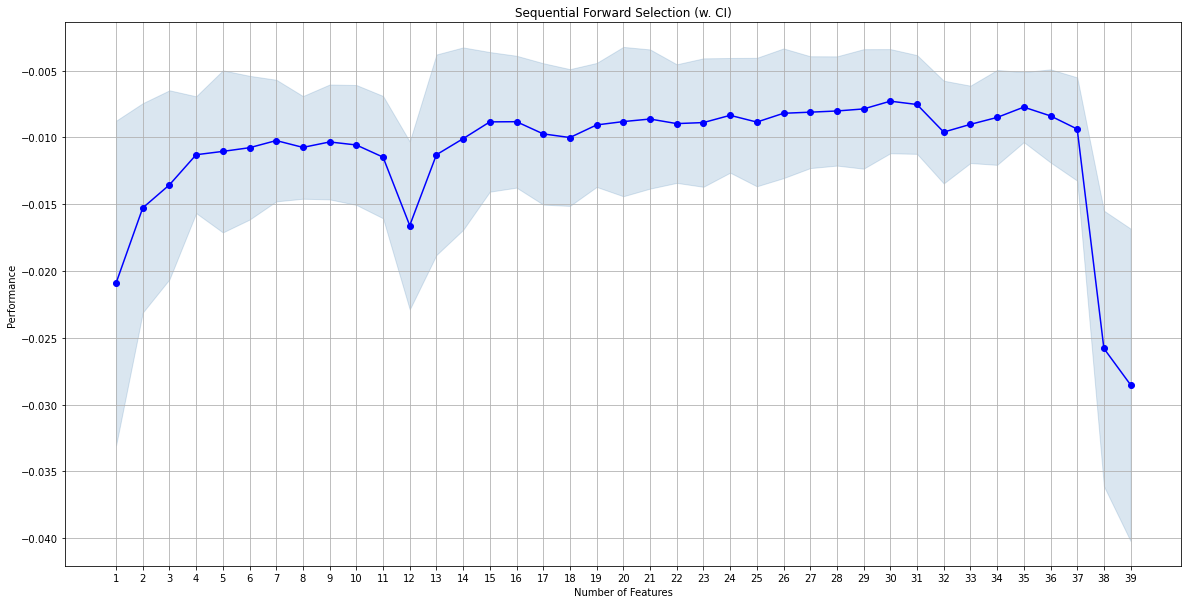

In [45]:
fig1 = plot_sfs(ffvs.get_metric_dict(), kind='ci',figsize=(20,10))
plt.title('Sequential Forward Selection (w. CI)')
plt.grid()
plt.show()

In [46]:
(ffvs.k_feature_idx_)

(1,
 2,
 3,
 4,
 5,
 7,
 8,
 9,
 11,
 12,
 13,
 14,
 16,
 17,
 19,
 20,
 21,
 23,
 24,
 26,
 28,
 29,
 30,
 31,
 34,
 35,
 36,
 37,
 38)

In [47]:
ffvs.k_score_

-0.007872924216256964

In [49]:
# Backward Floating Selection(sffs)
bfvs = SFS(model,
         k_features='parsimonious',
         forward=False,
         floating=True,
         verbose =1,
          scoring = 'neg_mean_squared_error',
          cv = 10,
         n_jobs=4)

In [50]:
bfvs.fit(x_train, y_train.ravel())

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  39 out of  39 | elapsed:    8.6s finished
Features: 38/1[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  38 out of  38 | elapsed:    7.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
Features: 37/1[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  37 out of  37 | elapsed:    6.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.4s finished
Features: 36/1[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  36 out of  36 | elapsed:    7.8s finished
[P

SequentialFeatureSelector(cv=10, estimator=EMRVR(gamma='auto'), floating=True,
                          forward=False, k_features='parsimonious', n_jobs=4,
                          scoring='neg_mean_squared_error', verbose=1)

In [51]:
(bfvs.k_feature_idx_)

(1, 2, 3, 4, 5, 6, 7, 16, 17, 18, 21, 23, 24, 28, 29, 30, 33, 34, 35, 36, 38)

In [52]:
bfvs.k_score_

-0.007381567555673587

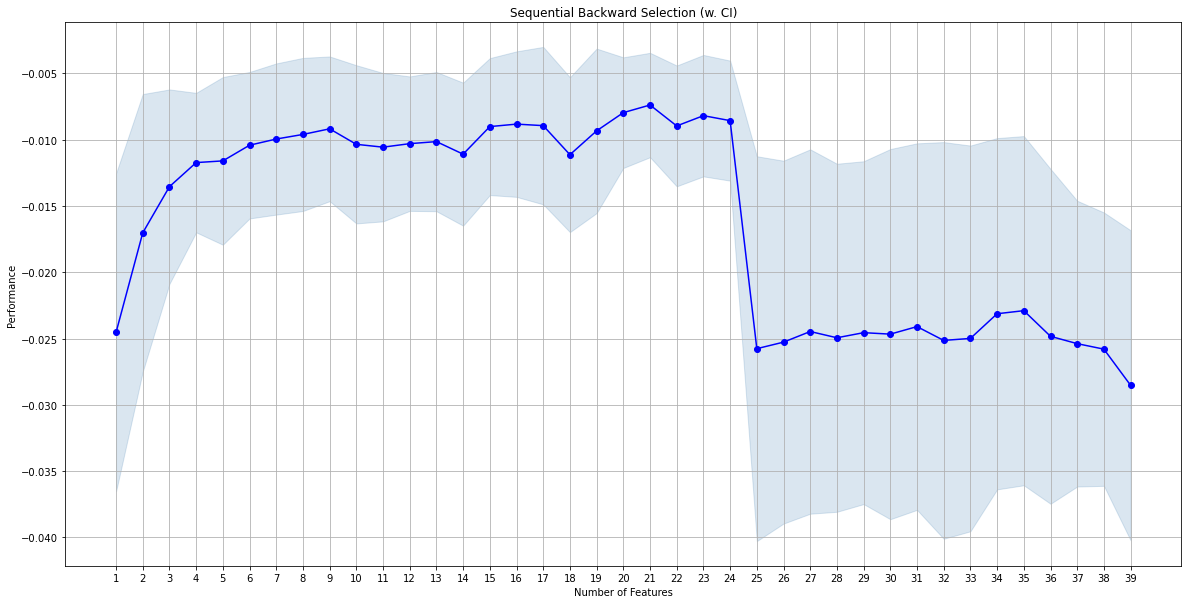

In [53]:
fig1 = plot_sfs(bfvs.get_metric_dict(), kind='ci',figsize=(20,10))
plt.title('Sequential Backward Selection (w. CI)')
plt.grid()
plt.show()

Identifying the best RVM parameter (gamma)

Let's do the same for all the other inputs

Using the three best bands

In [42]:
X=sm[['B1','B3','B2','B4','B5','B6', 'B7']].to_numpy()

clf.fit(X, y_train.ravel())
scores = clf.cv_results_['mean_test_score']

B7_gamma_sel = gammas[scores == np.max(scores)]
print(B7_gamma_sel[0])

model = EMRVR(kernel='rbf', gamma=B7_gamma_sel[0],bias_used=False)
model.fit(X, y_train.ravel())

y, y_std = model.predict(X, return_std=True)

mse = mean_squared_error(y_train, y)
B7_rmse = math.sqrt(mse)
print('RMSE = %.2f' %B7_rmse, "m3/m3")

B7_r2 = r2_score(y_train, y)
print("r2 =%.2f" %B7_r2)

KeyboardInterrupt: 

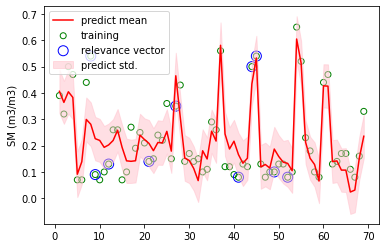

In [61]:
plt.scatter(xl, y_train, facecolor='none', edgecolor='g', label='training')
plt.scatter(xl[model.relevance_], y_train[model.relevance_], s=100, facecolor='none', edgecolor='b', label='relevance vector')
plt.plot(xl[:, None], y, color='r', label='predict mean')
plt.fill_between(xl, y - y_std, y + y_std, color='pink', alpha=0.5, label='predict std.')
plt.legend(loc='best')
plt.ylabel("SM (m3/m3)")

plt.show()

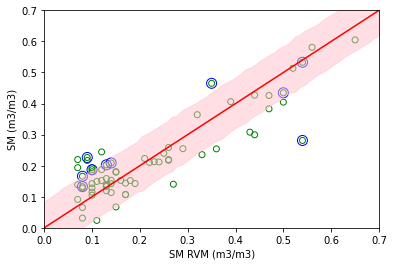

In [62]:
plt.scatter(y_train,y, facecolor='none', edgecolor='g')
plt.scatter(y_train[model.relevance_], y[model.relevance_], s=100, facecolor='none', edgecolor='b', label='relevance vector')

plt.xlabel("SM RVM (m3/m3)")
plt.ylabel("SM (m3/m3)")

axes = plt.gca()
axes.set_xlim([0,0.7])
axes.set_ylim([0,0.7])

xx = np.linspace(0,0.7,len(y))
yx = xx
plt.plot(xx, yx, '-r', label='y=x')
plt.fill_between(xx, yx - y_std, yx + y_std, color='pink', alpha=0.5, label='predict std.')

We found a winner! In the next step we will apply this RVM model to all four Landsat images 

https://towardsdatascience.com/how-to-identify-the-right-independent-variables-for-machine-learning-supervised-algorithms-439986562d32